## 0. Импорт библиотек 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## 1. Загрузка и первичный анализ данных


In [ ]:
df = pd.read_csv('data/WineDataset.csv')

print("Размер датасета:", df.shape)
df.head()


Размер датасета: (178, 14)


,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

In [4]:
print("Распределение классов:")
print(df['Wine'].value_counts().sort_index())

Распределение классов:
Wine
1    59
2    71
3    48
Name: count, dtype: int64


## 2. Предварительная обработка данных


In [5]:
df = df.dropna()
print(f"Размер датасета после удаления пустых строк: {df.shape}")

X = df.drop('Wine', axis=1)
y = df['Wine']


Размер датасета после удаления пустых строк: (178, 14)


## 3. Статистический анализ данных


In [6]:
X.describe()



,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 3.1. Визуализация статистики


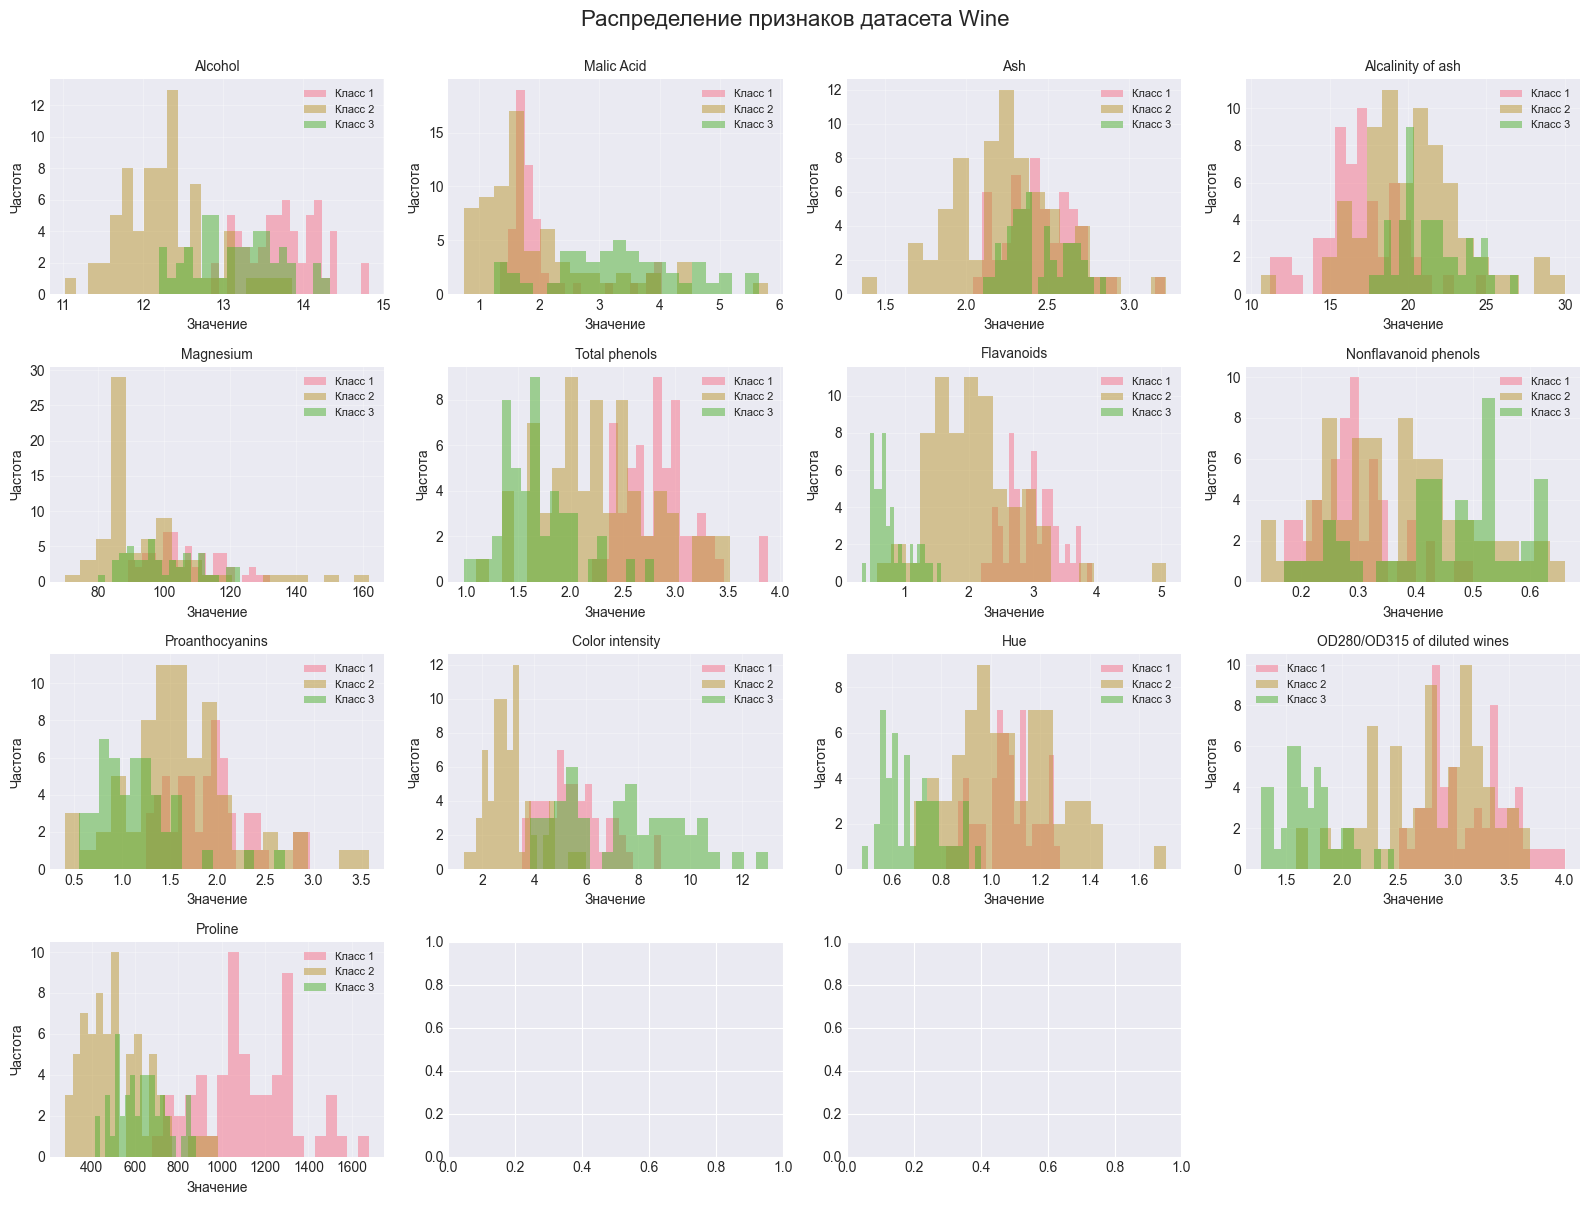

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
fig.suptitle('Распределение признаков датасета Wine', fontsize=16, y=1.00)

for idx, col in enumerate(X.columns):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    
    for wine_class in sorted(y.unique()):
        data = X[y == wine_class][col]
        ax.hist(data, alpha=0.5, label=f'Класс {int(wine_class)}', bins=20)
    
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

fig.delaxes(axes[3, 3])

plt.tight_layout()
plt.show()


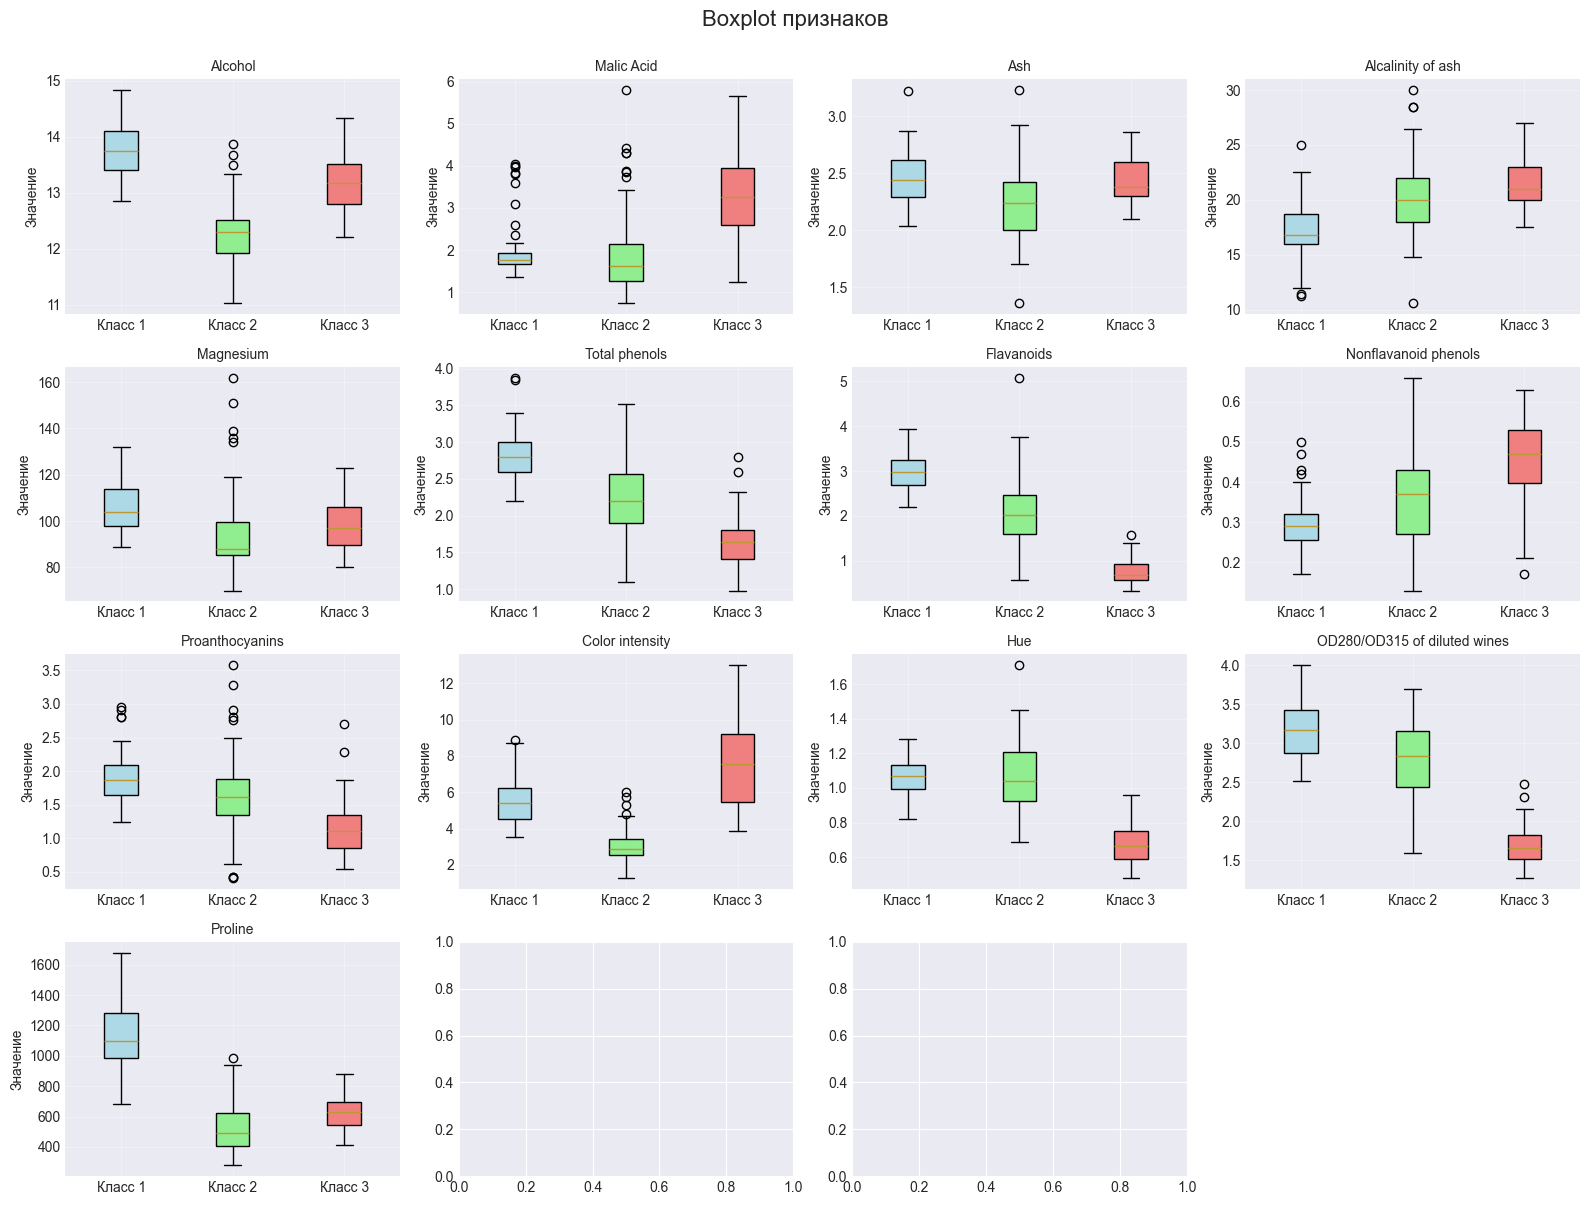

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
fig.suptitle('Boxplot признаков', fontsize=16, y=1.00)

for idx, col in enumerate(X.columns):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    
    data_by_class = [X[y == wine_class][col].values for wine_class in sorted(y.unique())]
    
    bp = ax.boxplot(data_by_class, labels=[f'Класс {int(c)}' for c in sorted(y.unique())],
                     patch_artist=True)
    
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(col, fontsize=10)
    ax.set_ylabel('Значение')
    ax.grid(True, alpha=0.3)

fig.delaxes(axes[3, 3])

plt.tight_layout()
plt.show()


### 3.2. 3D-визуализация признаков


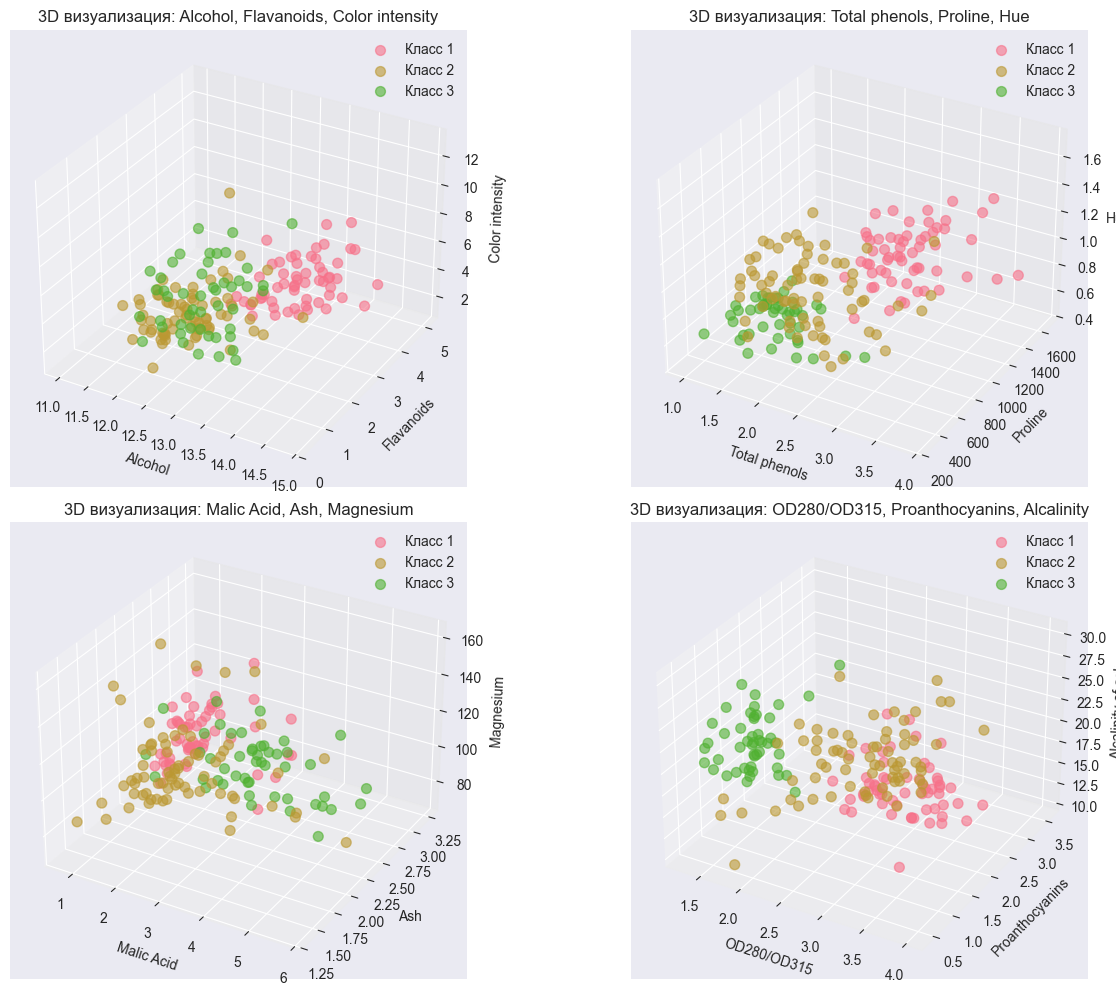

In [9]:
fig = plt.figure(figsize=(14, 10))

# График 1: Alcohol, Flavanoids, Color intensity
ax1 = fig.add_subplot(221, projection='3d')
for wine_class in sorted(y.unique()):
    mask = y == wine_class
    ax1.scatter(X[mask]['Alcohol'], 
                X[mask]['Flavanoids'], 
                X[mask]['Color intensity'],
                label=f'Класс {int(wine_class)}',
                s=50, alpha=0.6)
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Flavanoids')
ax1.set_zlabel('Color intensity')
ax1.set_title('3D визуализация: Alcohol, Flavanoids, Color intensity')
ax1.legend()

# График 2: Total phenols, Proline, Hue
ax2 = fig.add_subplot(222, projection='3d')
for wine_class in sorted(y.unique()):
    mask = y == wine_class
    ax2.scatter(X[mask]['Total phenols'], 
                X[mask]['Proline'], 
                X[mask]['Hue'],
                label=f'Класс {int(wine_class)}',
                s=50, alpha=0.6)
ax2.set_xlabel('Total phenols')
ax2.set_ylabel('Proline')
ax2.set_zlabel('Hue')
ax2.set_title('3D визуализация: Total phenols, Proline, Hue')
ax2.legend()

# График 3: Malic Acid, Ash, Magnesium
ax3 = fig.add_subplot(223, projection='3d')
for wine_class in sorted(y.unique()):
    mask = y == wine_class
    ax3.scatter(X[mask]['Malic Acid'], 
                X[mask]['Ash'], 
                X[mask]['Magnesium'],
                label=f'Класс {int(wine_class)}',
                s=50, alpha=0.6)
ax3.set_xlabel('Malic Acid')
ax3.set_ylabel('Ash')
ax3.set_zlabel('Magnesium')
ax3.set_title('3D визуализация: Malic Acid, Ash, Magnesium')
ax3.legend()

# График 4: OD280/OD315, Proanthocyanins, Alcalinity of ash
ax4 = fig.add_subplot(224, projection='3d')
for wine_class in sorted(y.unique()):
    mask = y == wine_class
    ax4.scatter(X[mask]['OD280/OD315 of diluted wines'], 
                X[mask]['Proanthocyanins'], 
                X[mask]['Alcalinity of ash'],
                label=f'Класс {int(wine_class)}',
                s=50, alpha=0.6)
ax4.set_xlabel('OD280/OD315')
ax4.set_ylabel('Proanthocyanins')
ax4.set_zlabel('Alcalinity of ash')
ax4.set_title('3D визуализация: OD280/OD315, Proanthocyanins, Alcalinity')
ax4.legend()

plt.tight_layout()
plt.show()


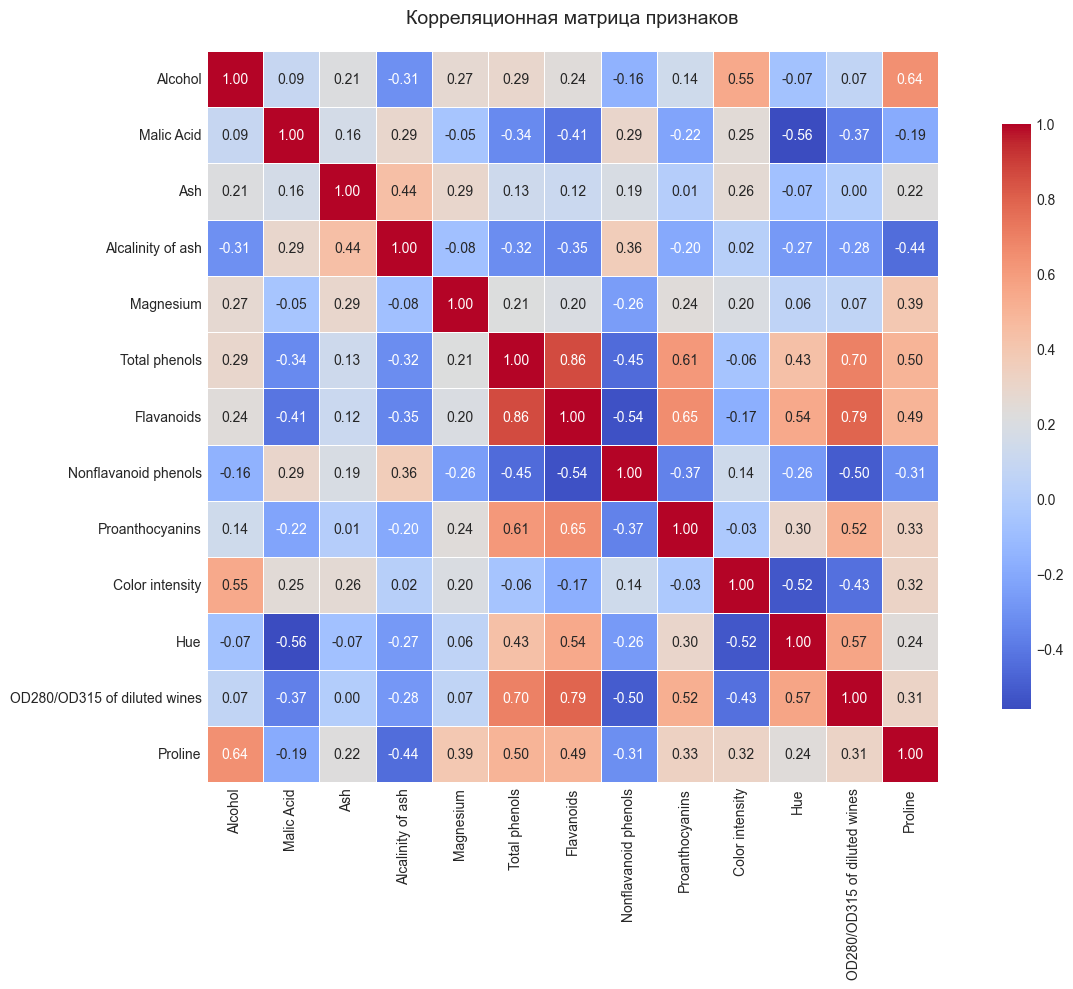

In [10]:
plt.figure(figsize=(14, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица признаков', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


## 4. Масштабирование данных


In [11]:
def standardize(data):
    """
    Стандартизация данных: (x - mean) / std
    """
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

X_array = X.values
y_array = y.values

X_scaled, mean, std = standardize(X_array)

print("Форма масштабированных данных:", X_scaled.shape)
print()
print("Пример масштабированных данных:")
print(X_scaled[:5, :5])

Форма масштабированных данных: (178, 13)

Пример масштабированных данных:
[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515]]


## 5. Разделение данных на обучающую и тестовую выборки


In [12]:
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)
    
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_array, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (143, 13)
Размер тестовой выборки: (35, 13)


## 6. Реализация алгоритма k-ближайших соседей (k-NN)


In [14]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def __euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def __predict_single(self, x):
        # Вычисление расстояний до всех обучающих образцов
        distances = []
        for i in range(len(self.X_train)):
            dist = self.__euclidean_distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))
        
        # Сортировка по расстоянию и выбор k ближайших
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        # Подсчет голосов
        k_nearest_labels = [label for _, label in k_nearest]
        
        # Возврат наиболее частого класса
        counts = {}
        for label in k_nearest_labels:
            counts[label] = counts.get(label, 0) + 1
        
        return max(counts, key=counts.get)
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            predictions.append(self.__predict_single(x))
        return np.array(predictions)
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        accuracy = np.sum(predictions == y_test) / len(y_test)
        return accuracy

In [15]:
def confusion_matrix(y_true, y_pred):
    """
    Построение матрицы ошибок
    """
    classes = np.unique(y_true)
    n_classes = len(classes)
    matrix = np.zeros((n_classes, n_classes), dtype=int)
    
    for i, true_class in enumerate(classes):
        for j, pred_class in enumerate(classes):
            matrix[i, j] = np.sum((y_true == true_class) & (y_pred == pred_class))
    
    return matrix, classes

In [16]:
def plot_confusion(cm, classes, title='Матрица ошибок', cmap=plt.cm.Blues):
    """
    Визуализация матрицы ошибок
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, [f'Класс {int(c)}' for c in classes])
    plt.yticks(tick_marks, [f'Класс {int(c)}' for c in classes])
    
    # Добавление значений в ячейки
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=14)
    
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()

In [17]:
def calculate_metrics(cm):
    """
    Вычисление метрик качества классификации
    """
    # Точность (Accuracy)
    accuracy = np.trace(cm) / np.sum(cm)
    
    # Precision, Recall, F1-score для каждого класса
    n_classes = cm.shape[0]
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    f1 = np.zeros(n_classes)
    
    for i in range(n_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        
        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0
    
    return accuracy, precision, recall, f1

## 7. Модель 1: Случайно отобранные признаки


In [18]:
np.random.seed(42)
n_random_features = 6
random_features = np.random.choice(X_scaled.shape[1], n_random_features, replace=False)
random_features = np.sort(random_features)

print(f"Случайно выбранные признаки (индексы): {random_features}")
print(f"Названия признаков: {[X.columns[i] for i in random_features]}")

X_train_random = X_train[:, random_features]
X_test_random = X_test[:, random_features]

print()
print(f"Размер обучающей выборки для Модели 1: {X_train_random.shape}")
print(f"Размер тестовой выборки для Модели 1: {X_test_random.shape}")


Случайно выбранные признаки (индексы): [ 0  2  5  8  9 11]
Названия признаков: ['Alcohol', 'Ash', 'Total phenols', 'Proanthocyanins', 'Color intensity', 'OD280/OD315 of diluted wines']

Размер обучающей выборки для Модели 1: (143, 6)
Размер тестовой выборки для Модели 1: (35, 6)


### 7.1. Оценка Модели 1 при разных значениях k


In [19]:
# Тестирование модели при разных значениях k
k_values = [1, 3, 5, 7, 10, 15, 20]
model1_results = {}

print("Модель 1 - оценка при разных k:")

for k in k_values:
    knn = KNNClassifier(k=k)
    knn.fit(X_train_random, y_train)
    
    y_pred = knn.predict(X_test_random)
    
    cm, classes = confusion_matrix(y_test, y_pred)
    accuracy, precision, recall, f1 = calculate_metrics(cm)
    
    model1_results[k] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'predictions': y_pred
    }
    
    print()
    print(f"k = {k}:")
    print(f"Точность (Accuracy): {accuracy:.4f}")
    print(f"Precision по классам: {precision}")
    print(f"Recall по классам: {recall}")
    print(f"F1-score по классам: {f1}")
    print(f"Среднее F1-score: {np.mean(f1):.4f}")
    print()


Модель 1 - оценка при разных k:

k = 1:
Точность (Accuracy): 0.8857
Precision по классам: [0.86666667 0.91666667 0.875     ]
Recall по классам: [1.         0.78571429 0.875     ]
F1-score по классам: [0.92857143 0.84615385 0.875     ]
Среднее F1-score: 0.8832


k = 3:
Точность (Accuracy): 0.9429
Precision по классам: [0.92857143 0.92857143 1.        ]
Recall по классам: [1.         0.92857143 0.875     ]
F1-score по классам: [0.96296296 0.92857143 0.93333333]
Среднее F1-score: 0.9416


k = 5:
Точность (Accuracy): 0.9714
Precision по классам: [0.92857143 1.         1.        ]
Recall по классам: [1.         0.92857143 1.        ]
F1-score по классам: [0.96296296 0.96296296 1.        ]
Среднее F1-score: 0.9753


k = 7:
Точность (Accuracy): 0.9714
Precision по классам: [1.         1.         0.88888889]
Recall по классам: [1.         0.92857143 1.        ]
F1-score по классам: [1.         0.96296296 0.94117647]
Среднее F1-score: 0.9680


k = 10:
Точность (Accuracy): 0.9714
Precision по кл

### 7.2. Визуализация результатов Модели 1


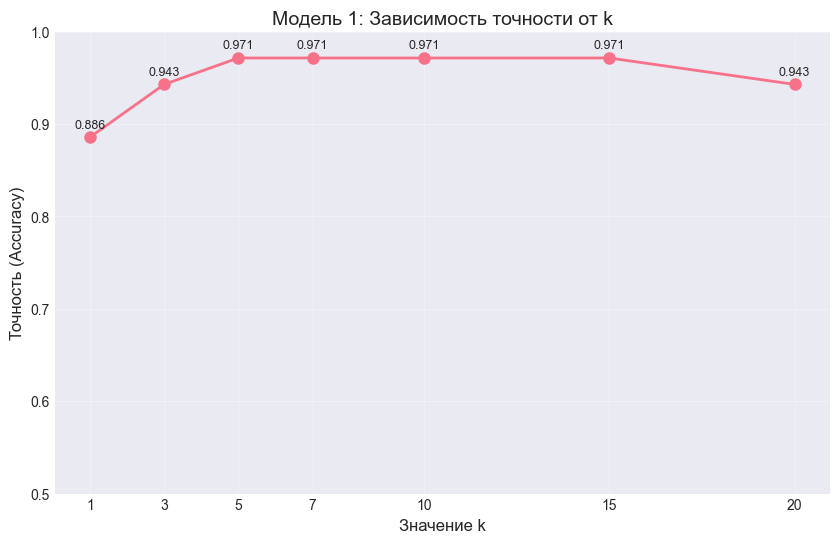

Оптимальное k для Модели 1: 5
Максимальная точность: 0.9714


In [20]:
accuracies = [model1_results[k]['accuracy'] for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linewidth=2, markersize=8)
plt.xlabel('Значение k', fontsize=12)
plt.ylabel('Точность (Accuracy)', fontsize=12)
plt.title('Модель 1: Зависимость точности от k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.ylim([0.5, 1.0])
for i, (k, acc) in enumerate(zip(k_values, accuracies)):
    plt.text(k, acc + 0.01, f'{acc:.3f}', ha='center', fontsize=9)
plt.show()

# Оптимальное k для модели 1
best_k_model1 = max(model1_results.keys(), key=lambda k: model1_results[k]['accuracy'])
print(f"Оптимальное k для Модели 1: {best_k_model1}")
print(f"Максимальная точность: {model1_results[best_k_model1]['accuracy']:.4f}")


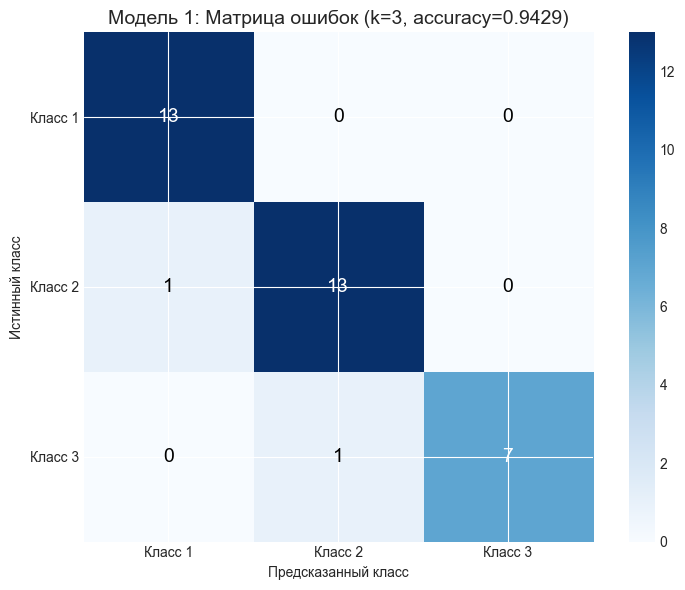

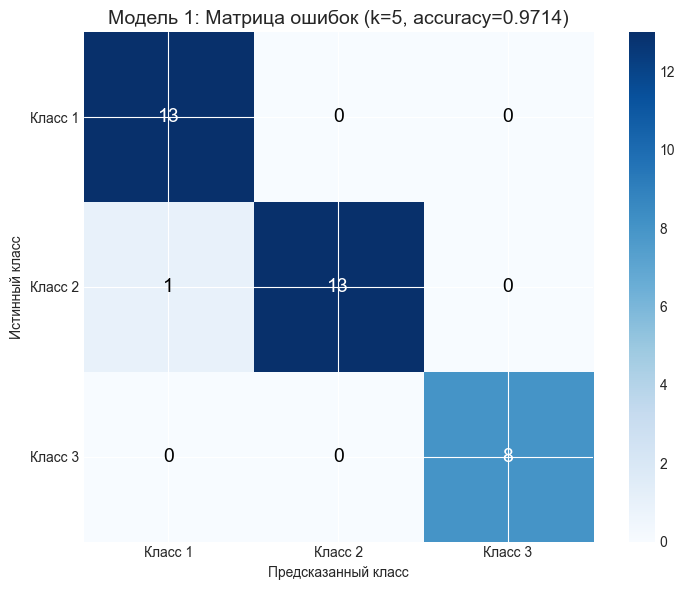

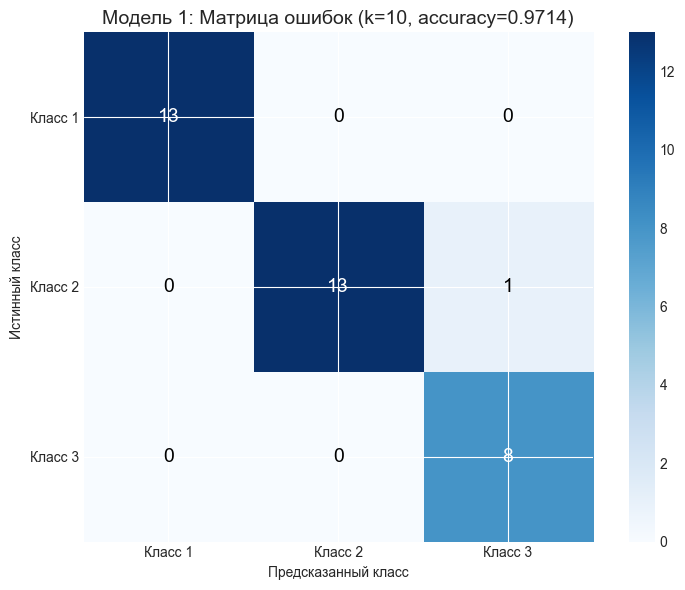

In [21]:
# Матрицы ошибок для разных k
selected_k = [3, 5, 10]

for k in selected_k:
    cm = model1_results[k]['confusion_matrix']
    plot_confusion(cm, classes, 
                         title=f'Модель 1: Матрица ошибок (k={k}, accuracy={model1_results[k]["accuracy"]:.4f})')


## 8. Модель 2: Фиксированный набор признаков


In [22]:

fixed_features = [0, 6, 9, 12, 5, 10]

print(f"Фиксированные признаки (индексы): {fixed_features}")
print(f"Названия признаков: {[X.columns[i] for i in fixed_features]}")

X_train_fixed = X_train[:, fixed_features]
X_test_fixed = X_test[:, fixed_features]

print()
print(f"Размер обучающей выборки для Модели 2: {X_train_fixed.shape}")
print(f"Размер тестовой выборки для Модели 2: {X_test_fixed.shape}")


Фиксированные признаки (индексы): [0, 6, 9, 12, 5, 10]
Названия признаков: ['Alcohol', 'Flavanoids', 'Color intensity', 'Proline', 'Total phenols', 'Hue']

Размер обучающей выборки для Модели 2: (143, 6)
Размер тестовой выборки для Модели 2: (35, 6)


### 8.1. Оценка Модели 2 при разных значениях k


In [23]:
model2_results = {}

for k in k_values:
    knn = KNNClassifier(k=k)
    knn.fit(X_train_fixed, y_train)
    
    y_pred = knn.predict(X_test_fixed)
    
    cm, classes = confusion_matrix(y_test, y_pred)
    accuracy, precision, recall, f1 = calculate_metrics(cm)
    
    model2_results[k] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'predictions': y_pred
    }
    
    print()
    print(f"k = {k}:")
    print(f"Точность (Accuracy): {accuracy:.4f}")
    print(f"Precision по классам: {precision}")
    print(f"Recall по классам: {recall}")
    print(f"F1-score по классам: {f1}")
    print(f"Среднее F1-score: {np.mean(f1):.4f}")



k = 1:
Точность (Accuracy): 0.9429
Precision по классам: [0.92857143 1.         0.88888889]
Recall по классам: [1.         0.85714286 1.        ]
F1-score по классам: [0.96296296 0.92307692 0.94117647]
Среднее F1-score: 0.9424

k = 3:
Точность (Accuracy): 0.9429
Precision по классам: [0.92857143 1.         0.88888889]
Recall по классам: [1.         0.85714286 1.        ]
F1-score по классам: [0.96296296 0.92307692 0.94117647]
Среднее F1-score: 0.9424

k = 5:
Точность (Accuracy): 0.9714
Precision по классам: [0.92857143 1.         1.        ]
Recall по классам: [1.         0.92857143 1.        ]
F1-score по классам: [0.96296296 0.96296296 1.        ]
Среднее F1-score: 0.9753

k = 7:
Точность (Accuracy): 0.9429
Precision по классам: [0.92857143 1.         0.88888889]
Recall по классам: [1.         0.85714286 1.        ]
F1-score по классам: [0.96296296 0.92307692 0.94117647]
Среднее F1-score: 0.9424

k = 10:
Точность (Accuracy): 0.9429
Precision по классам: [0.92857143 1.         0.8888

### 8.2. Визуализация результатов Модели 2


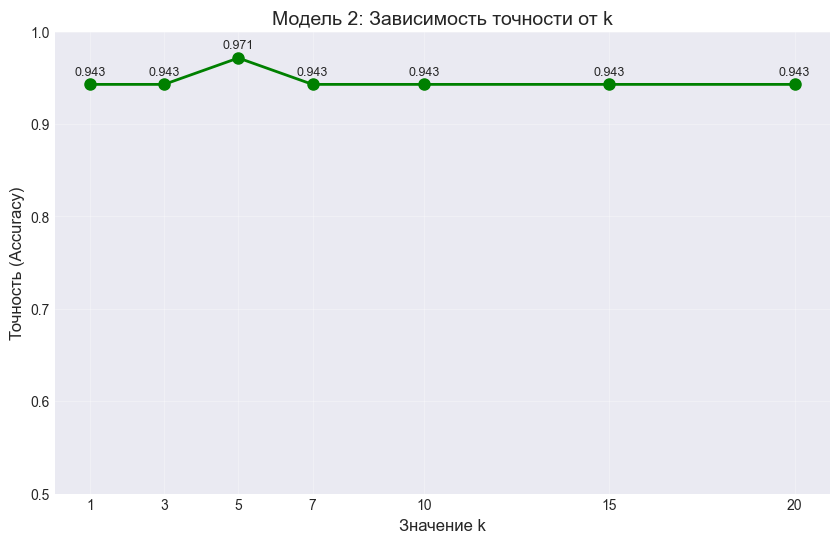


Оптимальное k для Модели 2: 5
Максимальная точность: 0.9714


In [24]:
accuracies_model2 = [model2_results[k]['accuracy'] for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_model2, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Значение k', fontsize=12)
plt.ylabel('Точность (Accuracy)', fontsize=12)
plt.title('Модель 2: Зависимость точности от k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.ylim([0.5, 1.0])
for i, (k, acc) in enumerate(zip(k_values, accuracies_model2)):
    plt.text(k, acc + 0.01, f'{acc:.3f}', ha='center', fontsize=9)
plt.show()

best_k_model2 = max(model2_results.keys(), key=lambda k: model2_results[k]['accuracy'])
print()
print(f"Оптимальное k для Модели 2: {best_k_model2}")
print(f"Максимальная точность: {model2_results[best_k_model2]['accuracy']:.4f}")


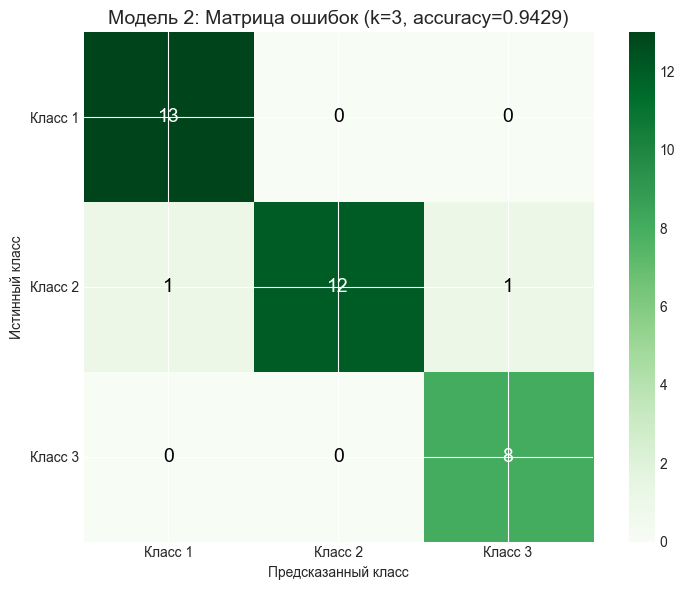

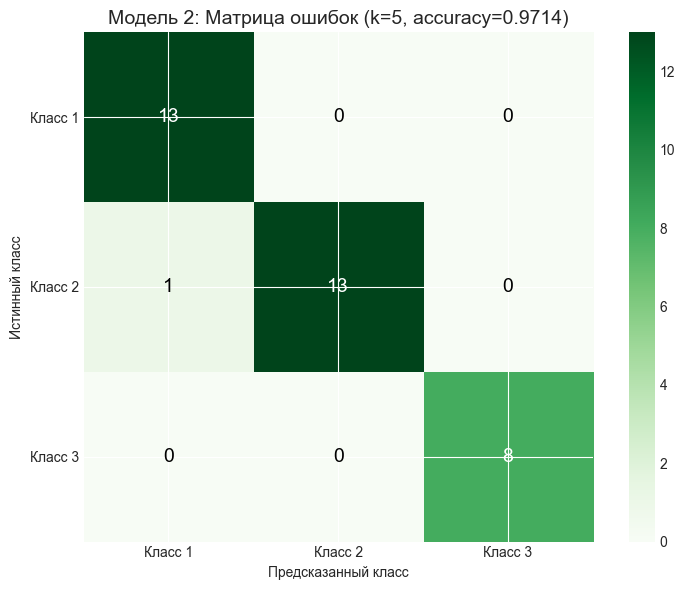

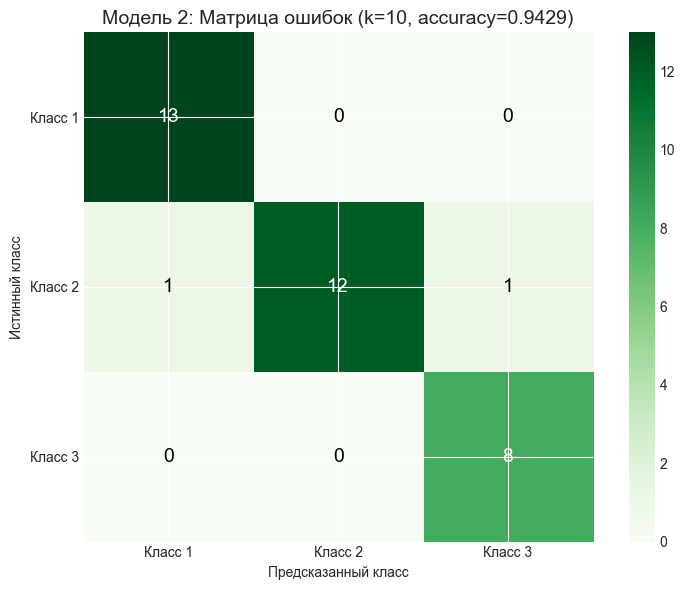

In [25]:
# Матрицы ошибок для разных k
for k in selected_k:
    cm = model2_results[k]['confusion_matrix']
    plot_confusion(cm, classes, 
                         title=f'Модель 2: Матрица ошибок (k={k}, accuracy={model2_results[k]["accuracy"]:.4f})',
                         cmap=plt.cm.Greens)


## 9. Сравнение моделей


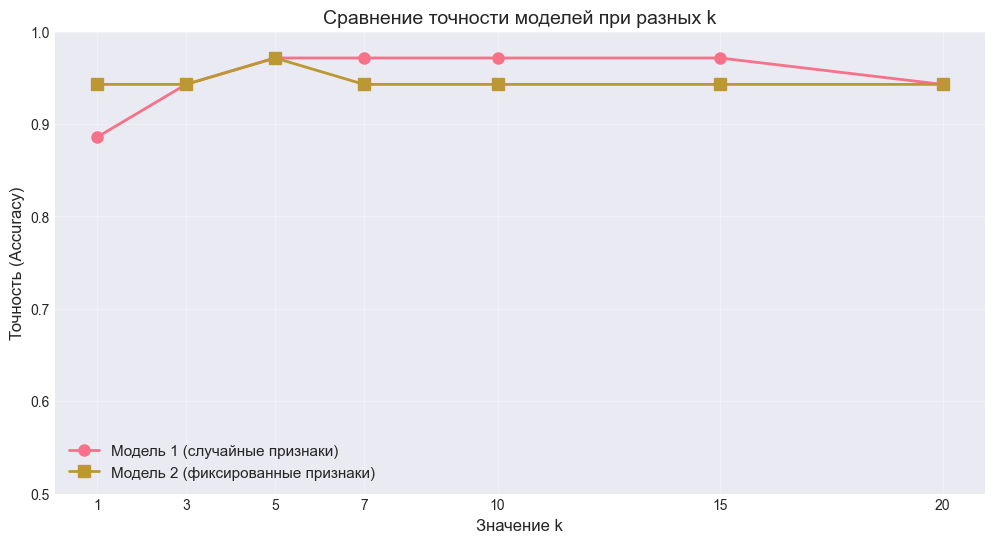

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linewidth=2, markersize=8, label='Модель 1 (случайные признаки)')
plt.plot(k_values, accuracies_model2, marker='s', linewidth=2, markersize=8, label='Модель 2 (фиксированные признаки)')
plt.xlabel('Значение k', fontsize=12)
plt.ylabel('Точность (Accuracy)', fontsize=12)
plt.title('Сравнение точности моделей при разных k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.ylim([0.5, 1.0])
plt.legend(fontsize=11)
plt.show()

In [27]:
comparison_data = []
for k in k_values:
    comparison_data.append({
        'k': k,
        'Модель 1 (Accuracy)': f"{model1_results[k]['accuracy']:.4f}",
        'Модель 1 (F1-mean)': f"{np.mean(model1_results[k]['f1']):.4f}",
        'Модель 2 (Accuracy)': f"{model2_results[k]['accuracy']:.4f}",
        'Модель 2 (F1-mean)': f"{np.mean(model2_results[k]['f1']):.4f}",
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df


,k,Модель 1 (Accuracy),Модель 1 (F1-mean),Модель 2 (Accuracy),Модель 2 (F1-mean)
0,1,0.8857,0.8832,0.9429,0.9424
1,3,0.9429,0.9416,0.9429,0.9424
2,5,0.9714,0.9753,0.9714,0.9753
3,7,0.9714,0.9680,0.9429,0.9424
4,10,0.9714,0.9680,0.9429,0.9424
5,15,0.9714,0.9680,0.9429,0.9424
6,20,0.9429,0.9424,0.9429,0.9424
